# Project: Sunset / Cloudy Sky Classifier
### Mobin Roohi
### SID: 610300060

In this project we will classify images of sunset and cloudy skies. The goal is to achieve this using by using inherent features of the images only, not using any existing famous and popular classifier.

To accomplish this, we will use the color feature of the images. Typically, sunset images have more red, orange, and yellow tones, while cloudy skies are more likely to feature shades of gray, blue, or white. Thus, using the color feature we can separate them.

One straightforward approach is to analyze the average color channels (Red, Green, Blue) of the images and base the classficiation upon the comparison between average red and average blue and base. The idea is simple and intuitive, given some image, on average, if it has more red color compared to blue, it is sunset, otherwise it is cloudy. 

First we import all the necessary libraries.

In [1]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt

Load the images and find their true labels!

In [7]:
image_path = './data/Images'
filenames = os.listdir(image_path)
labels = [filename[0] for filename in filenames]  # Extract 's' or 'c' from filenames
labels[::9]
ind = 0

Take a look at some of the dataset. With every run of the following block some image in the dataset will show up along with its average RGB.

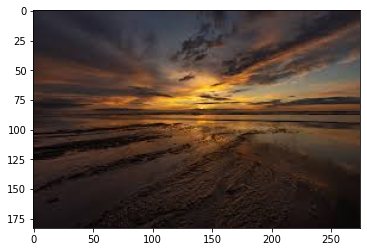

In [101]:
ind = np.random.randint(0, len(filenames))
image = cv2.imread(image_path + "/" + filenames[ind])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread(image_path + "/" + filenames[ind])
avg_row_clr = np.average(image, axis=0)
avg_clr = np.average(avg_row_clr, axis=0)
plt.imshow(image_rgb)
plt.show()


In [112]:
def classify_image(image_path):
    image = cv2.imread(image_path)
    avg_row_clr = np.average(image, axis=0)
    avg_clr = np.average(avg_row_clr, axis=0)
    avg_red, avg_green, avg_blue = avg_clr

    threshold_red = 50
    red_blue_ratio = 1.5


    if avg_red < avg_blue:
        return 's'  # sunset
    else:
        return 'c'  # cloudy


predicted_labels = []

for filename in filenames:
    imagein_path = os.path.join(image_path, filename)
    predicted_labels.append(classify_image(imagein_path))


In [113]:
# Evaluation
accuracy = accuracy_score(labels, predicted_labels)
conf_matrix = confusion_matrix(labels, predicted_labels)
precision = precision_score(labels, predicted_labels, pos_label='s')
recall = recall_score(labels, predicted_labels, pos_label='s')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7875
Confusion Matrix:
[[24 16]
 [ 1 39]]
Precision: 0.7090909090909091
Recall: 0.975


By running the following block, you can now see random images and their classification according to the classifier defined here.

Classification Result -> c


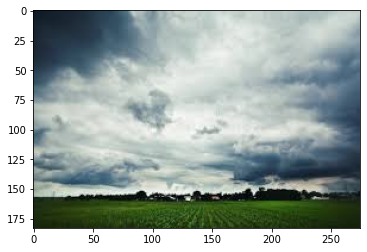

In [124]:
ind = np.random.randint(0, len(filenames))
image = cv2.imread(image_path + "/" + filenames[ind])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread(image_path + "/" + filenames[ind])
avg_row_clr = np.average(image, axis=0)
avg_clr = np.average(avg_row_clr, axis=0)
plt.imshow(image_rgb)
print("Classification Result -> " + classify_image(image_path + "/" + filenames[ind]))
plt.show()

Using this method, the classifier is very good at classifying sunsets achieving near perfect $0.975$ recall. It may not be performing its best on classifying the cloudy weather images, but the overall accuracy is not bad either.

You might be interested too see what image it was that prevented the recall from being 1. That image is the following:

[147.56131148 152.40635867 136.77309488]
Classification Result -> c


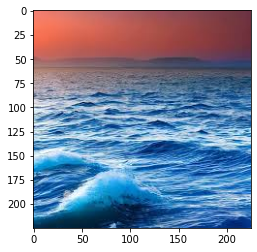

In [125]:
image = cv2.imread(image_path + "/" + filenames[55])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread(image_path + "/" + filenames[ind])
avg_row_clr = np.average(image, axis=0)
avg_clr = np.average(avg_row_clr, axis=0)
plt.imshow(image_rgb)
print(avg_clr)
print("Classification Result -> " + classify_image(image_path + "/" + filenames[55]))
plt.show()

As you can see, by using only the average blue and red colors of the image, the classifier was misled to believe that this image was of cloudy weather. This is due to the image focusing on the blue surface of the water. A human can easily distinguish from the top of the image that the sky is red and orange, thus it is sunset. But the classifiier we have used here, only takes the average RGB numbers into account. Thus it misclassified the image.